# Macroeconomic default modelling - a Machine Learning approach

### Outline of the script(s)

__- Creating the Analytic Base Table (ABT) + Exploratory Data Analysis__  _(This Notebook)_ __Total Runtime <10sek__


- Preprocessing the Dataset  _(1_ _Preprocessing.ipynb)_


- Modelling part   _(2a R models.ipynb)_

## What is the Probability of Default

- The probability of default (PD) is a key credit risk parameter describing the likelihood of a credit default over a particular time horizon - usually 1 year 


- Estimating default probabilities is the first step in assessing the credit exposure and potential losses faced by financial institutions


- Default probabilities are also the basic inputs when evaluating systemic risk and stress testing financial systems


- You have credit scores, such as SCHUFA for individual consumers or bond ratings from S&P, Fitch or Moodys for corporations or governments. Every rating class typically implies a certain probability of default.

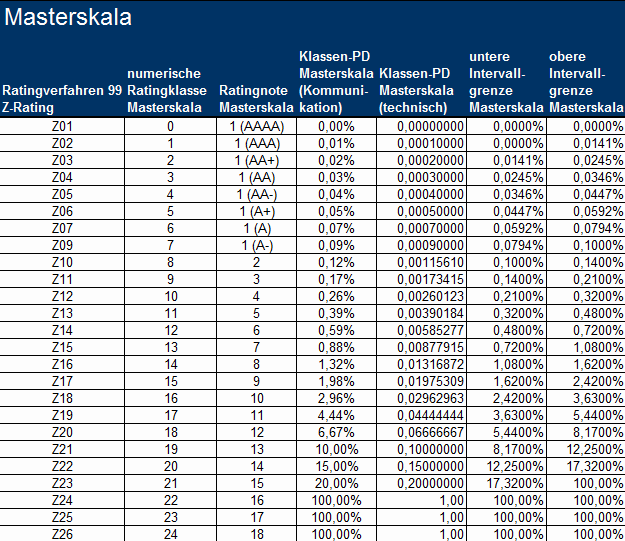

In [65]:
#install.packages("IRdisplay");
library(IRdisplay) 
#is the package!

#Here we see the PD for each rating class of the overall bank portfolio of HSH.
document_name = "Masterskala.png"
file_location=paste(getwd(),"/", document_name, sep= "")

display_png(file=file_location)  


## Why is it useful to estimate

- It has become more important in the last decade, as it serves as an important input factor for determining the minimum capital requirements for banks using IRB (internal-rated based) approach.


- Default rates are usually set in relation to macroeconomic variables. 


# The concept of macroeconomic-based models (tbd)

### Idea 

- two types: market-based models vs. fundamental-based models 


- Macroeconomic-based models are motivated by the observation that default rates in the financial, corporate, and household sectors increase during recessions. 



- This observation has led to the implementation of econometric models that attempt to explain default indicators, such as default probabilities or default rates, using macroeconomic variables.


- Macroeconomic models, used in this research, explain changes in the default rate out of macroeconomic conditions. These macroeconomic variables are cyclical indicators, e.g. GDP growth or interest rates, and financial market indicators, e.g.  stockmarket prices and stockmarket volatility

### Disadvantages (tbd)

- On the other hand, a disadvantage of macroeconomic-models is that the time-span of the data needs to be longer than one  business cycle, otherwise the model would not capture the impact of the business cycle on default probabilities


- Macroeconomic models can be classified into exogenous and endogenous models, i.e. whether the model allows feedback between financial distress and the explanatory economic variables. 


- The first category of macroeconomic-based models assumes that the economic variables are exogenous and not affected by financial distress. 




### The general approach to exogeneous modelling is described by the following equation:

$$pd_t = g(x_1,x_2,\ldots, x_n) + \epsilon$$


- where pd is the probability of default, over a given period $t$. 


- $X = (x_1, x_2, \ldots, x_n)$ a function of a set of economic variables and a random variable (like GDP growth f.ex)


A problem of the exogenous approach is the fact that __the relation between macroeconomic variables and the default rate is  assumed to be the same during periods of economic downturn and expansion. This seems intuitively implausible__


The second category of macroeconomic-based models assumes that the economic variables are endogenous and differ in times of financial distress. The typical econometric framework used in these models is the vector autoregressive (VAR) methodology.

### We can write the VAR in a more general form as:

$$Z_{t+1} = \alpha_t + \sum_{j=1}^p \beta_j \cdot z_{t+1-j} +\epsilon_{t+1} $$


where $\alpha_t$ is a constant vector, $\beta_j$ are (lagged) coefficients matrices, $\epsilon_{t+1}$ is a
vector of residuals/shocks, and $z$ is the vector of endogenous variables, which includes both default probabilities and aggregate economic variables associated to the state of the business cycle. In principle, inference in VAR models is
sensitive to the choice of lags. If a large number of lags is included, degrees of freedom are lost. If the lag length is too small, important lag dependencies may be omitted.

## Our hypotheses and assumptions in the models: (tbd)
1. Examined macroeconomic factors (GDP growth, interest rate, unemployment, etc.) have significant influence on the AR in all of the models.
2. The PD will always over/underestimate the true AR, but we can model it more precisely than the baseline model
3. The baseline model is to assume the current AR value forward for the next period
4. Linear Regression can perform better than the Baseline Model
5. ML will perform better than our LR models



## PDs vs Logit PDs

- The aim of the analyzes is to determine the estimation of the regression coefficients and the selection of the macroeconomic factors in such a way that they make economic sense within the framework of the respective model


- To achieve statistical quality of the estimates both Y and X may be suitably transformed.


The transformation used is called logit transformation.

$$Logit_{PD} = \ln \frac{PD}{1-PD}$$

Why do we take all the trouble doing the transformation from probability to log odds?  

- One reason is that it is usually difficult to model a variable which has restricted range, such as probability. 
- This transformation is an attempt to get around the restricted range problem.  
- It maps probability ranging between 0 and 1 to log odds ranging from __negative infinity to positive infinity.__ 
- Another reason is that among all of the infinitely many choices of transformation, the log of odds is one of the easiest to understand and interpret.  

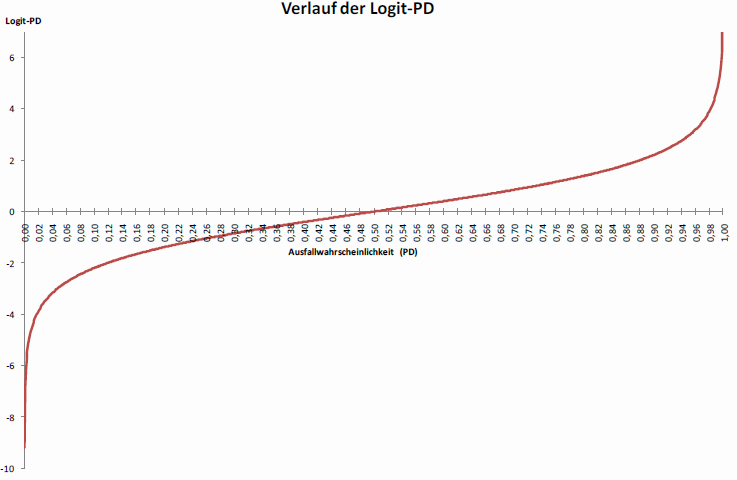

In [66]:
#The following diagram shows the course of the Logit-PD as a function of the PD. 
#It can be seen that the logit transformation does not alter the monotony, i. a high value for the Logit-PD means a big risk,
#analogous to the PD.

document_name = "Logit.png"
file_location=paste(getwd(),"/", document_name, sep= "")

display_png(file=file_location)  

In addition to the logit transformation, it often makes sense not to describe the absolute values of the PD or Logit-PD by a model but their relative or absolute changes. These changes may occur over time, i. from the time t to the time t + 1 or by changing - for example, stressed - influence variables. Formally, this is expressed as follows:

$$\Delta \text{Logit_PD}_t := \text{Logit-PD}_t -\text{Logit-PD}_{t-1}$$

Forcasting forward that would lead to:

$$\text{Logit_PD}_{t+1} := \text{Logit-PD}_t + \Delta \text{Logit-PD}_{t+1}$$

And to bring it back to original PD-values:

$$\text{PD}_{t+1} = \frac{1}{1+\exp^{\text{-Logit_PD}_{t+1}}}\Leftrightarrow \text{PD}_{t+1} = \frac{\exp^{\text{Logit_PD}_{t+1}}}{1+\exp^{\text{Logit_PD}_{t+1}}}$$

# Introduction to the HSH dataset (tbd)

__Corporates__

The Corporates segment includes all:

- corporate customers


- __excluding:__
1. those already considered in the Shipping sub-portfolio "Corporates" 
2. aircraft financing (airline financing). 
3. also exclude leasing companies and leveraged finance businesses

The aim of the analyzes is to identify models that suitably map the Logit-AR or the Logit-PD or ΔLogit-PD of the cyclical and cyclical historical AR / PD time series


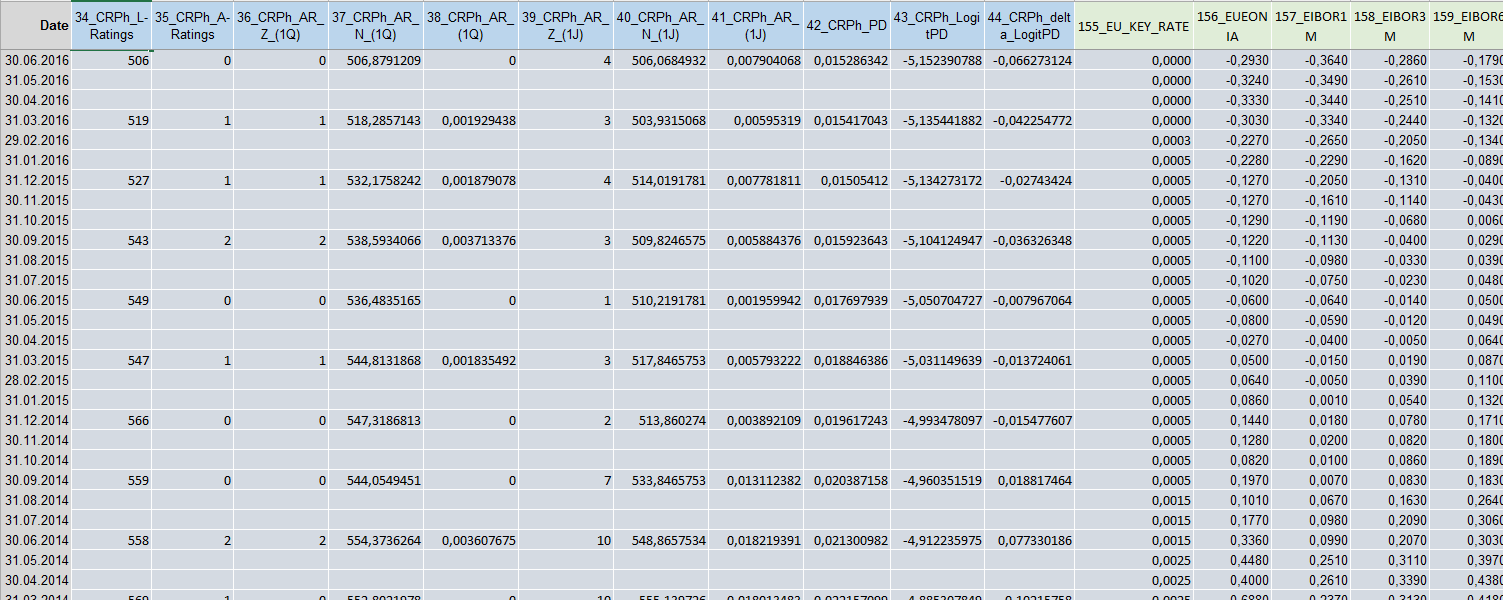

In [67]:
document_name = "HSH_Exceldatensatz.png"
file_location=paste(getwd(),"/", document_name, sep= "")

display_png(file=file_location)  

In [68]:
#End of Intro

In [69]:
#Start of Script

### 1. First, let's load (and install where neccessary) the packages that we are using

In [70]:
### Load packages (and install the ones missing)
suppressMessages(if (!require("pacman")) install.packages("pacman", repos = "http://cran.us.r-project.org"))
pacman::p_load("readxl","Hmisc","mice","IRdisplay",
                                "VIM","car","Amelia", 
                                "ggplot2", "dplyr", "caret", "broom",
                                "tibble","labeling", "digest", "VIM","curl",
                                "devtools", "dataPreparation")#add more packages here if needed! #"imputeTS"
#install_github("SteffenMoritz/imputeTS")#run if needed

### 2. Now, let's import our adjusted datasheet from the HSH excel file

In [71]:
document_name = "2018_ABT_ML_v10_mit interpolation_Uwe.xlsx"
file_location=paste(getwd(),"/", document_name, sep= "")
col_types <- c("date", rep("numeric", 518))#1 Date column and 518 other columns
suppressWarnings(
#select only the final sheet from the excel file
ABT <- read_excel(file_location, 
                  sheet = "ABT_clean_transformed", col_types = col_types))

### 3. Perform a few necessary transformations on the analytic base table (ABT)

In [72]:
ABT <- as.data.frame(ABT)#convert to dataframe
ABT$Date = as.Date(as.character(ABT$Date), "%Y-%m-%d")#convert to right time-format
temp = colnames(ABT)[-1]#transform all columns, except for Date. Reason: a colname can't start with a number => not allowed in R)
temp = gsub("\\)", ".", temp)#replace special character ")" with "."
temp = gsub("\\(", ".", temp)#replace special character "(" with "."
new_column_names = c("Date", paste("pre_",temp, sep=""))
names(ABT) = new_column_names#replace now the col-names

### 4. Filter the data:

- We use the dplyr package for subsetting the dataframe. 
- Due to various recalibrations in the rating module, the internal time series starts from the third quarter of 2006 onwards only. (see "Szenarioanalyse-v3.04.pdf")
- Therefore, the analysis is based on the interval: 2006-09-30 to 2016-06-30.

__UPDATE__:
- As mentioned in the Methodic-documentation the historic PD-Values are only "reliable" starting from 2006-09-30. 
- But since we look at the 1-year-deltas of the Logit-PD the time series should consequently start at 2007-09-03.
- Therefore the analysis is based on the interval: __2007-09-30__ to __2016-06-30__

In [73]:
start_date = "2006-09-30" #see validation paper # after AR transformation is done (see later in this script, filter again date
# to 2007-09-30!!)
end_date = "2016-06-30"

ABT = ABT%>%
filter(Date>=start_date & Date <= end_date)

Warning message:
"Mangling the following names: pre_484_HKSHRPRCF<U+200B> -> pre_484_HKSHRPRCF<U+200B>, pre_570_ITUN%TOTQ<U+200B> -> pre_570_ITUN%TOTQ<U+200B>, pre_571_ESUN%TOTQ<U+200B> -> pre_571_ESUN%TOTQ<U+200B>. Use enc2native() to avoid the warning."

### 5. Let's inspect the first rows of our ABT 

In [74]:
#Let's inspect 1yr of data
head(ABT,13)
cat("Number of columns:", ncol(ABT),"\n")
cat("Number of rows:", nrow(ABT))

Date,pre_34_CRPh_L-Ratings,pre_35_CRPh_A-Ratings,pre_36_CRPh_AR_Z_.1Q.,pre_37_CRPh_AR_N_.1Q.,pre_38_CRPh_AR_.1Q.,pre_39_CRPh_AR_Z_.1J.,pre_40_CRPh_AR_N_.1J.,pre_41_CRPh_AR_.1J.,pre_42_CRPh_PD,...,pre_654_BBJPY6M,pre_655_TRJP10T,pre_656_TRJP15T,pre_657_TRJP20T,pre_658_TRJP30T,pre_659_TRJP1YT,pre_660_TRJP2YT,pre_661_ITGBOND,pre_662_ESGBOND.,pre_663_EURO_GOVBONDS_YTM
2016-06-30,506,0,0,506.8791,0.000000000,4,506.0685,0.007904068,0.01528634,...,-0.00950,-0.225,-0.069,0.075,0.142,-0.302,-0.298,0.00891,0.0148,0.01041443
2016-05-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,-0.00507,-0.114,0.054,0.250,0.299,-0.256,-0.236,0.00922,0.0157,0.01161943
2016-04-30,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.00586,-0.076,0.092,0.300,0.346,-0.255,-0.233,0.00872,0.0153,0.01181578
2016-03-31,519,1,1,518.2857,0.001929438,3,503.9315,0.005953190,0.01541704,...,0.02350,-0.042,0.173,0.449,0.542,-0.189,-0.207,0.00843,0.0154,0.01166164
2016-02-29,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,-0.00629,-0.058,0.198,0.547,0.860,-0.172,-0.232,0.01010,0.0172,0.01249888
2016-01-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.06143,0.114,0.423,0.825,1.076,-0.061,-0.060,0.00968,0.0172,0.01407001
2015-12-31,527,1,1,532.1758,0.001879078,4,514.0192,0.007781811,0.01505412,...,0.11929,0.272,0.566,1.001,1.274,-0.058,-0.009,0.01015,0.0169,0.01476363
2015-11-30,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.11643,0.305,0.645,1.067,1.384,-0.008,0.002,0.01000,0.0172,0.01433637
2015-10-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0.12157,0.304,0.643,1.069,1.352,0.007,0.007,0.01102,0.0173,0.01424655
2015-09-30,543,2,2,538.5934,0.003713376,3,509.8247,0.005884376,0.01592364,...,0.12514,0.350,0.690,1.128,1.401,0.011,0.019,0.01279,0.0202,0.01555659


Number of columns: 519 
Number of rows: 118

### 6. Check for duplicate columns and remove them

In [75]:
cat("Number of columns before removal of duplicates:", ncol(ABT),"\n")
ABT = ABT[!duplicated(lapply(ABT, digest))] #Delta_Miete_H_real und Delta_Lrst_B are equal!
cat("Number of columns after removal of duplicates:", ncol(ABT), "\n")

Number of columns before removal of duplicates: 519 
Number of columns after removal of duplicates: 518 


### 7. Remove features that contain NA's

In [76]:
#1 check for NAs and remove columns where they exist (I don't want to impute our feature data)
ABT_features = ABT %>%
select(-contains("_CRPh_"), -contains("Date"))

ABT_non_features = ABT %>%
select( contains("Date"), contains("_CRPh_"))

cat("Number of overall features:", ncol(ABT_features),"\n")

na_columns=sapply(ABT_features, function(y) sum(is.na(y)))
null_columns = sapply(ABT_features, is.null)    

ABT_features=ABT_features[,names(na_columns[na_columns==0])]#remove all columns that have an NA in it
cat("Number of 'clean' features:", ncol(ABT_features))
                  


Number of overall features: 506 
Number of 'clean' features: 477

### 8. Check for Collinearity among features

Collinearity is a linear association between two explanatory variables. Two variables are perfectly collinear if there is an exact linear relationship between them. For example, $X_1$ $X_2$  are perfectly collinear if there exist parameters $\lambda _{0}$ and $\lambda _{1}$ such that, for all observations $i$, we have

$$X_{2i} = \lambda_0 + \lambda_1 \cdot X_{1i}$$
- We have 477 features, but as we will see below, there exist many pairs that show high correlation to one another, even as high as 99.9%.


- This could lead to a problem regarding our predicitons.


- As a result we will remove one of the pairs, that have correlation > 99.9%.

In [77]:
#The function “mosthighlycorrelated()” will print out the linear correlation coefficients for each pair of variables in our
#data set, ordered by size of the correlation coefficient. This lets you see very easily which pair of variables are most highly 
#correlated

mosthighlycorrelated <- function(mydataframe,numtoreport)
{
# find the correlations
cormatrix <- cor(mydataframe)
# set the correlations on the diagonal or lower triangle to zero,
# so they will not be reported as the highest ones:
diag(cormatrix) <- 0
cormatrix[lower.tri(cormatrix)] <- 0
# flatten the matrix into a dataframe for easy sorting
fm <- as.data.frame(as.table(cormatrix))
# assign human-friendly names
names(fm) <- c("First.Variable", "Second.Variable","Correlation")
fm$Correlation = abs(fm$Correlation)
# sort and print the top n correlations
head(fm[order(abs(fm$Correlation),decreasing=T),],n=numtoreport)
}

temp = mosthighlycorrelated(ABT_features, 100000000)

temp = temp%>%
filter(Correlation > 0.98)%>%
distinct(First.Variable)

cat("How many features have correlation > 98%:", length(temp$First.Variable))

#if you want to remove them, run this following line of code:
ABT_features=ABT_features[,!names(ABT_features) %in% temp$First.Variable]

How many features have correlation > 98%: 239

### 9. Further filtering of unhelpful variables

The first thing to do, in order to make computation fast, would be to filter useless variables:


- Constant variables
- Variables that exist twice (for example feature1 == feature2)
- Variables that are exact bijections (for example col1 = A, B, B, A and col2 = 1, 2, 2, 1)

In [78]:
constant_cols <- whichAreConstant(ABT_features)
double_cols <- whichAreInDouble(ABT_features)
bijections_cols <- whichAreBijection(ABT_features)

[1] "whichAreConstant: it took me 0.37s to identify 0 constant column(s)"
[1] "whichAreInDouble: it took me 1.45s to identify 0 column(s) to drop."
[1] "whichAreBijection: pre_280_Spread_Corporates_AA_1-3_ is a bijection of pre_279_Spread_Corporates_AAA_1-3. I put it in drop list."
[1] "whichAreBijection: pre_282_Spread_Corporates_BBB-_1-3 is a bijection of pre_279_Spread_Corporates_AAA_1-3. I put it in drop list."
[1] "whichAreBijection: pre_286_Spread_Corporates_BBB-__3-5 is a bijection of pre_279_Spread_Corporates_AAA_1-3. I put it in drop list."
[1] "whichAreBijection: pre_287_Spread_Corporates_AAA_5-7 is a bijection of pre_279_Spread_Corporates_AAA_1-3. I put it in drop list."
[1] "whichAreBijection: pre_288_Spread_Corporates_AA_5-7_ is a bijection of pre_279_Spread_Corporates_AAA_1-3. I put it in drop list."
[1] "whichAreBijection: pre_292_Spread_Corporates_AA_7-10 is a bijection of pre_279_Spread_Corporates_AAA_1-3. I put it in drop list."
[1] "whichAreBijection: pre_293_Spread_

In [79]:
#if you want to remove them, run this following line of code:
ABT_features = ABT_features%>% select(-bijections_cols)

In [80]:
#Merge the remaining columns (features+non-features) back together
ABT = cbind(ABT_non_features, ABT_features)
cat("Number of columns:", ncol(ABT),"\n")
cat("Number of rows:", nrow(ABT))

Number of columns: 82 
Number of rows: 118

### 10. Visualize the PD in comparison with AR, Logit-PD and delta-Logit 

Here we want to show how the PD estimates from the HSH model measures up against their actual AR values. In addition we plot the logit transformations that were performed on the PD.

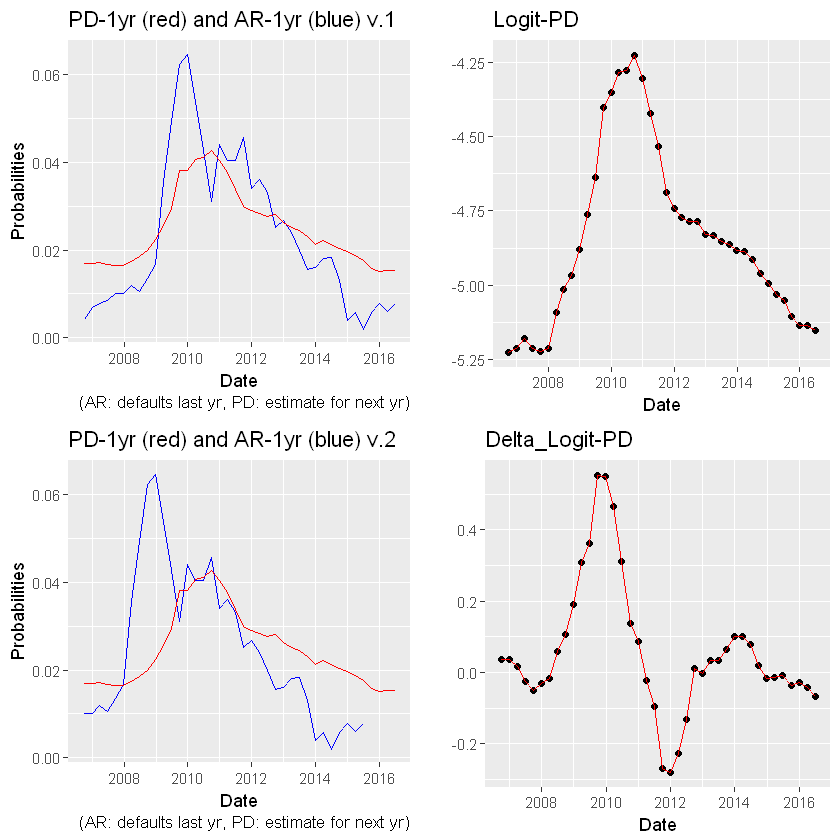

In [81]:
#First we need to shift the AR values down, since they are a description of the last 12 months. The shift makes sure
#that the PD and AR can be compared against
temp = ABT%>%select(contains("Date"), contains("41_CRPh_AR_.1J."))
temp = transform(temp, pre_41_CRPh_AR_.1J. = c(rep(NA,12), pre_41_CRPh_AR_.1J.[1:(length(pre_41_CRPh_AR_.1J.)-12)]))

#plot PD
p1 = ggplot() +
    geom_line(data = ABT%>%select(contains("Date"), contains("41_CRPh_AR_.1J."))%>%na.omit(),
              aes(x = Date, y = pre_41_CRPh_AR_.1J., group = 1),color="blue") +
    geom_line(data = ABT%>%select(contains("Date"), contains("42_CRPh_PD"))%>%na.omit(),
              aes(x = Date, y = pre_42_CRPh_PD, group = 1),color="red") +
    geom_point(na.rm = TRUE) +
    ggtitle("PD-1yr (red) and AR-1yr (blue) v.1")+
    ylab("Probabilities")+
    labs(caption = "(AR: defaults last yr, PD: estimate for next yr)")+
    theme(legend.position="right")

p2 = ggplot() +
    geom_line(data = temp%>%na.omit(),
              aes(x = Date, y = pre_41_CRPh_AR_.1J., group = 1),color="blue") +
    geom_line(data = ABT%>%select(contains("Date"), contains("42_CRPh_PD"))%>%na.omit(),
              aes(x = Date, y = pre_42_CRPh_PD, group = 1),color="red") +
    geom_point(na.rm = TRUE) +
    ggtitle("PD-1yr (red) and AR-1yr (blue) v.2")+
    ylab("Probabilities")+
    labs(caption = "(AR: defaults last yr, PD: estimate for next yr)")+
    theme(legend.position="right")

#plot Logit-PD
p3 = ggplot(data = ABT%>%select(contains("Date"), contains("43_CRPh_LogitPD"))%>%na.omit(), aes(x = Date, y = pre_43_CRPh_LogitPD)) + 
    geom_point(na.rm = TRUE) +
    geom_line(color="red") +
    ggtitle("Logit-PD")+
    ylab("")

#plot delta Logit-PD
p4 = ggplot(data = ABT%>%select(contains("Date"), contains("44_CRPh_delta_LogitPD"))%>%na.omit(), aes(x = Date, y = pre_44_CRPh_delta_LogitPD)) + 
    geom_point(na.rm = TRUE) +
    geom_line(color="red") +
    ggtitle("Delta_Logit-PD")+
    ylab("")

multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  require(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

multiplot(p1, p2, p3, p4, cols=2)
#> `geom_smooth()` using method = 'loess'



## Conclusion:
__Version1__
- We see that the PD-estimates done by HSH fails to accurately model the actual default rate. (See Top Left plot)
- It overestimated most of the time, and underestimates when needed the most: during a crisis (see 2008-2009)


__Version2__

- We see a similar effect in Version 1, just more exagerated

## Caveat: 
- the average PD at time t (in years) is a point estimate for the default rate (AR) at time t+1
- it's not clear from the documentation that HSH correctly placed them on the same row
- __PEAK DEFAULT RATE in 2009 or 2010? What do you guys think - what could be more likely?__


=> We need to include Logit-AR


## Add also Logit-AR/delta-Logit-AR to the dataset

In [82]:
ABT_features = ABT %>%
select(-contains("_CRPh_"), -contains("Date"))

ABT_non_features = ABT %>%
select(contains("Date"), contains("_CRPh_"))

#add own columns
#logit-transformation
ABT_non_features$pre_45_CRPh_LogitAR_.1J. = logit(ABT_non_features$pre_41_CRPh_AR_.1J.) 

#delta-Logit-transformation
ABT_non_features$pre_46_CRPh_delta_LogitAR_.1J. = 
    c(diff(ABT_non_features$pre_45_CRPh_LogitAR_.1J., lag = 3, differences = 1),NA,NA,NA)*(-1)

#shifted AR added
ABT_non_features$pre_47_CRPh_AR_.1J._shifted = 
    c(rep(NA,12), ABT_non_features$pre_41_CRPh_AR_.1J.[1:(length(ABT_non_features$pre_41_CRPh_AR_.1J.)-12)])

#logit-AR shifted
ABT_non_features$pre_48_CRPh_LogitAR_.1J._shifted = 
    c(rep(NA,12), ABT_non_features$pre_45_CRPh_LogitAR_.1J.[1:(length(ABT_non_features$pre_45_CRPh_LogitAR_.1J.)-12)])

#delta-Logit-AR shifted
ABT_non_features$pre_49_CRPh_delta_LogitAR_.1J._shifted = 
    c(rep(NA,12), ABT_non_features$pre_46_CRPh_delta_LogitAR_.1J.[1:(length(ABT_non_features$pre_46_CRPh_delta_LogitAR_.1J.)-12)])

ABT = cbind(ABT_non_features, ABT_features)#at the end we combine all columns back together
head(ABT_non_features,13)

Date,pre_34_CRPh_L-Ratings,pre_35_CRPh_A-Ratings,pre_36_CRPh_AR_Z_.1Q.,pre_37_CRPh_AR_N_.1Q.,pre_38_CRPh_AR_.1Q.,pre_39_CRPh_AR_Z_.1J.,pre_40_CRPh_AR_N_.1J.,pre_41_CRPh_AR_.1J.,pre_42_CRPh_PD,pre_43_CRPh_LogitPD,pre_44_CRPh_delta_LogitPD,pre_45_CRPh_LogitAR_.1J.,pre_46_CRPh_delta_LogitAR_.1J.,pre_47_CRPh_AR_.1J._shifted,pre_48_CRPh_LogitAR_.1J._shifted,pre_49_CRPh_delta_LogitAR_.1J._shifted
2016-06-30,506,0,0,506.8791,0.000000000,4,506.0685,0.007904068,0.01528634,-5.152391,-0.066273124,-4.832442,0.2854149,NA,NA,NA
2016-05-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2016-04-30,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2016-03-31,519,1,1,518.2857,0.001929438,3,503.9315,0.005953190,0.01541704,-5.135442,-0.042254772,-5.117857,-0.2697031,NA,NA,NA
2016-02-29,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2016-01-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2015-12-31,527,1,1,532.1758,0.001879078,4,514.0192,0.007781811,0.01505412,-5.134273,-0.027434240,-4.848154,0.2813988,NA,NA,NA
2015-11-30,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2015-10-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2015-09-30,543,2,2,538.5934,0.003713376,3,509.8247,0.005884376,0.01592364,-5.104125,-0.036326348,-5.129553,1.1033257,NA,NA,NA


In [83]:
start_date = "2007-09-30" 
end_date = "2016-06-30"

ABT = ABT%>%
filter(Date>=start_date & Date <= end_date)

Warning message:
"Mangling the following names: pre_570_ITUN%TOTQ<U+200B> -> pre_570_ITUN%TOTQ<U+200B>, pre_571_ESUN%TOTQ<U+200B> -> pre_571_ESUN%TOTQ<U+200B>. Use enc2native() to avoid the warning."

# Let's plot the AR, Logit-AR and delta Logit AR

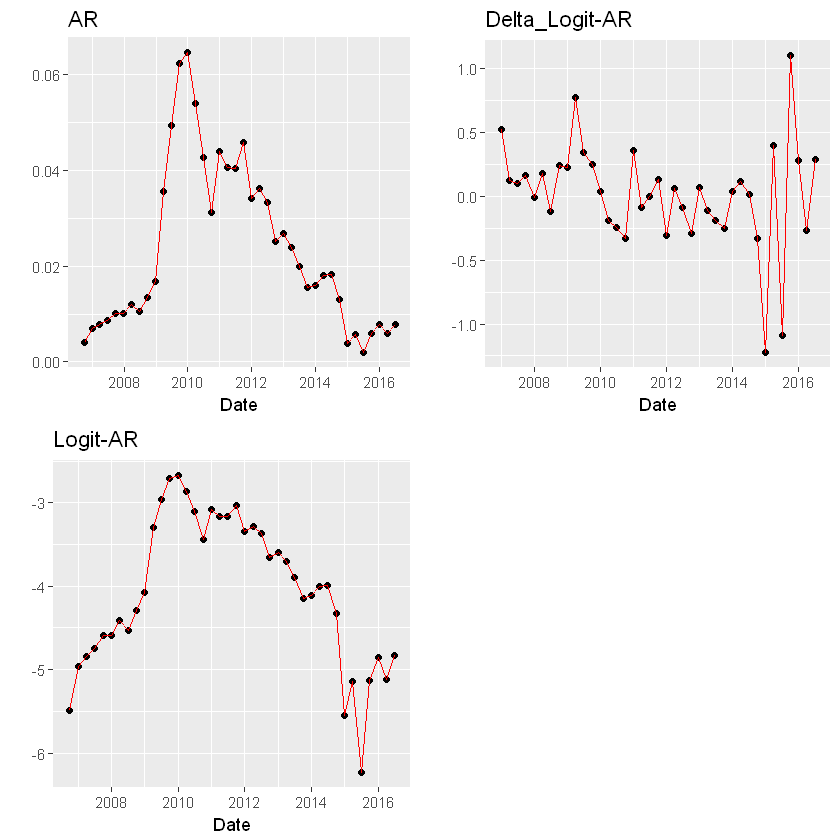

In [84]:
#plot AR
p5 = ggplot(data = ABT_non_features%>%select(contains("Date"), contains("pre_41_CRPh_AR_.1J."))%>%na.omit(), aes(x = Date, y = pre_41_CRPh_AR_.1J.)) + 
    geom_point(na.rm = TRUE) +
    geom_line(color="red") +
    ggtitle("AR")+
    ylab("")

#plot Logit-AR
p6 = ggplot(data = ABT_non_features%>%select(contains("Date"), contains("pre_45_CRPh_LogitAR_.1J."))%>%na.omit(), aes(x = Date, y = pre_45_CRPh_LogitAR_.1J.)) + 
    geom_point(na.rm = TRUE) +
    geom_line(color="red") +
    ggtitle("Logit-AR")+
    ylab("")

#plot delta Logit-AR
p7 = ggplot(data = ABT_non_features%>%select(contains("Date"), contains("pre_46_CRPh_delta_LogitAR_.1J."))%>%na.omit(), aes(x = Date, y = pre_46_CRPh_delta_LogitAR_.1J.)) + 
    geom_point(na.rm = TRUE) +
    geom_line(color="red") +
    ggtitle("Delta_Logit-AR")+
    ylab("")

multiplot(p5, p6, p7, cols=2)

# Conclusion (tbd)

On the mission to model the default rate, our data set that we use to train and test on is quite sparse. Missing data is a significant problem, because we have only AR values on a quarterly basis. Therefore, filling in this missing data is crucial to achieve a high modeling score. As a result, I think that feature engineering and missing data imputation are significantly more important for doing well than the actual modelling part. At least, one can argue that the modeling score is highly sensitive to each individual datapoint. Given this small dataset each point has relatively high "value" which makes overfitting very easy, i.e. modeling for robust results very hard. 
If we were to simply exclude data points from our analyic base table, we would leave a lot of crucial information on the table.

But filling in missing data in this dataset is not so trivial. Some of the variables have missing data for almost every observation. Some variables have a considerable number of missing values. And some variables have only a small number of missing values. With the assistance of the mice package, we are going to do some extensive imputation on this dataset.

In [85]:
#Final ABT
write.csv(ABT,"ABT.csv",row.names=FALSE)

In [86]:
#END